## Use Case Vorhersage von Sales Daten mithilfe Linearer Regression

In [24]:
# import 
import pandas as pd
import numpy as np
import plotly.express as px

In [25]:
# Laden des Datasets
sales = pd.read_csv("../Datasets/sales_all.csv")

In [26]:
sales.head()

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0


In [27]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1923 entries, 0 to 1922
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1923 non-null   object 
 1   WeekdayNo          1923 non-null   int64  
 2   Weekday            1923 non-null   object 
 3   HolidayFlag        1923 non-null   bool   
 4   SchoolHolidayFlag  1923 non-null   bool   
 5   Sales              1923 non-null   float64
dtypes: bool(2), float64(1), int64(1), object(2)
memory usage: 64.0+ KB


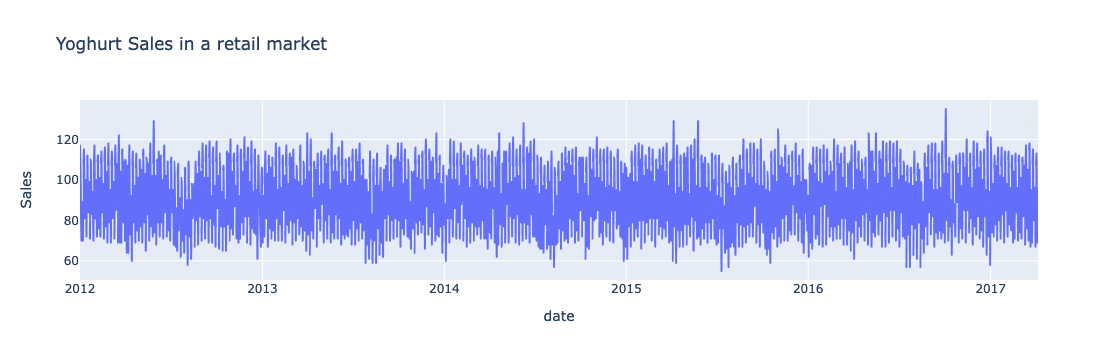

In [28]:
px.line(sales, x="date", y="Sales", title='Yoghurt Sales in a retail market')

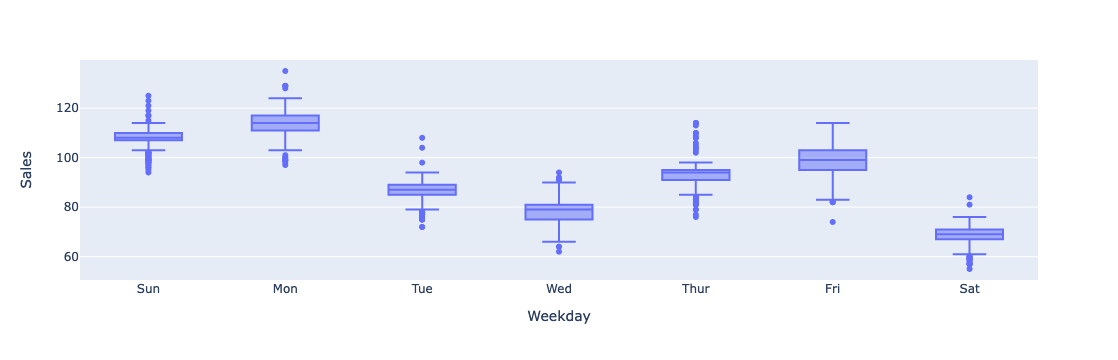

In [29]:
px.box(sales,y='Sales', x='Weekday') # Montags wohl am meisten Joghurt verkauft, Samstags am wenigsten

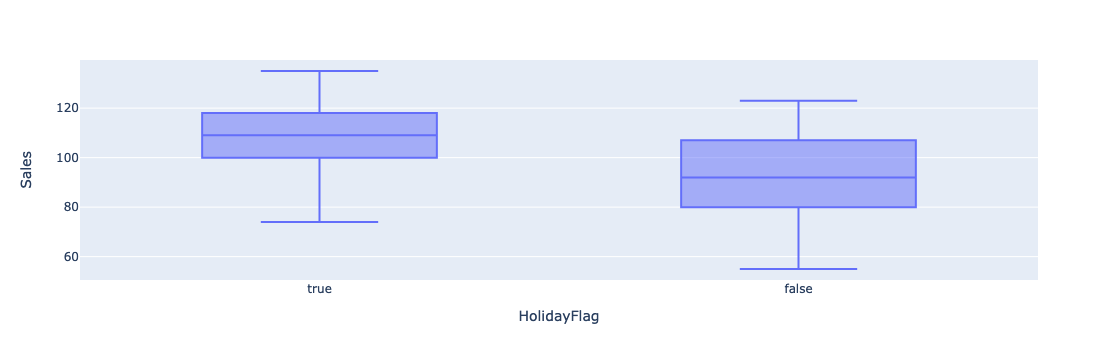

In [30]:
px.box(sales,y='Sales', x='HolidayFlag') # An Urlaubstagen mehr verkauft

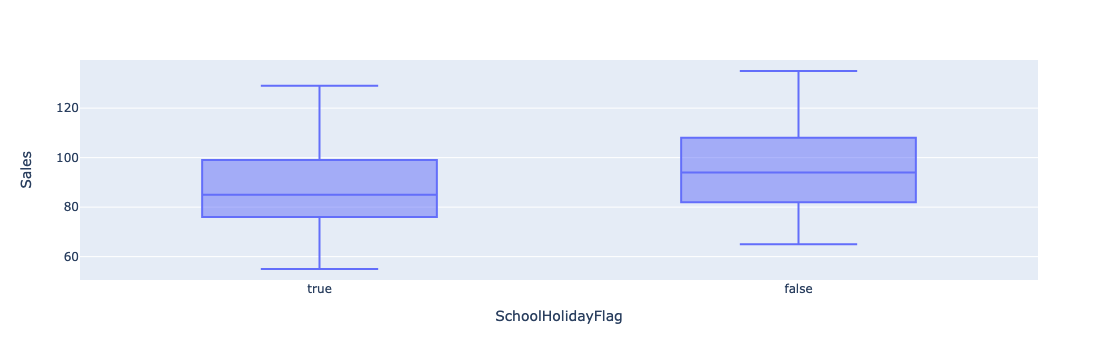

In [31]:
px.box(sales,y='Sales', x='SchoolHolidayFlag') # In Schulferien weniger Verkauf 

In [32]:
# Zu viele Kombinationen um Regeln manuell zu pflegen --> Lösung Machine Learning

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = sales.iloc[:,1:-1]
y = sales.Sales

In [34]:
X

,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag
0,6,Sun,True,True
1,0,Mon,False,True
2,1,Tue,False,True
3,2,Wed,False,True
4,3,Thur,False,True
...,...,...,...,...
1918,6,Sun,False,False
1919,0,Mon,False,False
1920,1,Tue,False,False
1921,2,Wed,False,False


In [35]:
#One Hot Encoding
pd.get_dummies(X)

,WeekdayNo,HolidayFlag,SchoolHolidayFlag,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thur,Weekday_Tue,Weekday_Wed
0,6,True,True,False,False,False,True,False,False,False
1,0,False,True,False,True,False,False,False,False,False
2,1,False,True,False,False,False,False,False,True,False
3,2,False,True,False,False,False,False,False,False,True
4,3,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
1918,6,False,False,False,False,False,True,False,False,False
1919,0,False,False,False,True,False,False,False,False,False
1920,1,False,False,False,False,False,False,False,True,False
1921,2,False,False,False,False,False,False,False,False,True


In [36]:
X = pd.get_dummies(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_test,y_test)

0.9444605950550657

In [39]:
lm.intercept_ # Gibt den y-Achsenabschnitt aus

113022278127473.86

In [40]:
lm.coef_ # gibt die Koeffizient w für alle Features aus

array([-5.42836097e+12,  1.34257812e+01, -7.40649414e+00, -9.13088343e+13,
       -1.13022278e+14, -8.58804733e+13, -8.04521123e+13, -9.67371952e+13,
       -1.07593917e+14, -1.02165556e+14])

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mse = mean_squared_error(lm.predict(X_test),y_test)

In [43]:
mse ## Durchschnittliche quadratische Abweichung

13.216667512175325

In [44]:
import math
math.sqrt(mse) #durchschnittliche Abweichung --> root mean squared error

3.635473492156878

In [45]:
sales

,date,WeekdayNo,Weekday,HolidayFlag,SchoolHolidayFlag,Sales
0,2012-01-01,6,Sun,True,True,117.0
1,2012-01-02,0,Mon,False,True,106.0
2,2012-01-03,1,Tue,False,True,82.0
3,2012-01-04,2,Wed,False,True,70.0
4,2012-01-05,3,Thur,False,True,84.0
...,...,...,...,...,...,...
1918,2017-04-02,6,Sun,False,False,107.0
1919,2017-04-03,0,Mon,False,False,113.0
1920,2017-04-04,1,Tue,False,False,87.0
1921,2017-04-05,2,Wed,False,False,69.0


In [46]:
# Vergleich kein Machine Learning
mean_per_Weekday = sales.groupby('Weekday').Sales.transform('mean')
mse = mean_squared_error(mean_per_Weekday,sales.Sales)
math.sqrt(mse) #bessere Performance mit ML

5.056163542420497